In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("Total_population.csv")
FP = pd.read_csv("Female_population.csv", skiprows=4)
MP = pd.read_csv("Male_population.csv", skiprows=4)
Concat = pd.concat([data,FP,MP], ignore_index=True)
Concat.to_csv('TP.csv', index=False)

In [73]:
data = pd.read_csv("TP.csv")
data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,Kosovo,XKX,"Population, male",SP.POP.TOTL.MA.IN,480530.0,490286.0,504594.0,518893.0,533197.0,547497.0,...,892179.0,886760.0,893367.0,896319.0,892156.0,892592.0,890237.0,878107.0,NaN,NaN
792,"Yemen, Rep.",YEM,"Population, male",SP.POP.TOTL.MA.IN,2766233.0,2815795.0,2865985.0,2915350.0,2968527.0,3027525.0,...,14439156.0,14820156.0,15202496.0,15578957.0,15953578.0,16320979.0,16668432.0,17023203.0,NaN,NaN
793,South Africa,ZAF,"Population, male",SP.POP.TOTL.MA.IN,8502461.0,8725719.0,8971110.0,9228327.0,9496079.0,9774939.0,...,27155417.0,27418165.0,27465269.0,27822349.0,28207948.0,28580784.0,28894608.0,29168006.0,NaN,NaN
794,Zambia,ZMB,"Population, male",SP.POP.TOTL.MA.IN,1544463.0,1593349.0,1644170.0,1696940.0,1751316.0,1807590.0,...,8000338.0,8260471.0,8525934.0,8794716.0,9066397.0,9338613.0,9609004.0,9877642.0,NaN,NaN


In [74]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,NaN,NaN


In [75]:
data.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
791,Kosovo,XKX,"Population, male",SP.POP.TOTL.MA.IN,480530.0,490286.0,504594.0,518893.0,533197.0,547497.0,...,892179.0,886760.0,893367.0,896319.0,892156.0,892592.0,890237.0,878107.0,NaN,NaN
792,"Yemen, Rep.",YEM,"Population, male",SP.POP.TOTL.MA.IN,2766233.0,2815795.0,2865985.0,2915350.0,2968527.0,3027525.0,...,14439156.0,14820156.0,15202496.0,15578957.0,15953578.0,16320979.0,16668432.0,17023203.0,NaN,NaN
793,South Africa,ZAF,"Population, male",SP.POP.TOTL.MA.IN,8502461.0,8725719.0,8971110.0,9228327.0,9496079.0,9774939.0,...,27155417.0,27418165.0,27465269.0,27822349.0,28207948.0,28580784.0,28894608.0,29168006.0,NaN,NaN
794,Zambia,ZMB,"Population, male",SP.POP.TOTL.MA.IN,1544463.0,1593349.0,1644170.0,1696940.0,1751316.0,1807590.0,...,8000338.0,8260471.0,8525934.0,8794716.0,9066397.0,9338613.0,9609004.0,9877642.0,NaN,NaN
795,Zimbabwe,ZWE,"Population, male",SP.POP.TOTL.MA.IN,1883976.0,1942236.0,2002581.0,2065073.0,2129644.0,2196331.0,...,6652836.0,6796658.0,6940631.0,7086002.0,7231989.0,7385220.0,7543690.0,7705601.0,NaN,NaN


In [76]:
data.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                4
                 ... 
2020                2
2021                2
2022                2
2023              796
Unnamed: 68       796
Length: 69, dtype: int64

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    796 non-null    object 
 1   Country Code    796 non-null    object 
 2   Indicator Name  796 non-null    object 
 3   Indicator Code  796 non-null    object 
 4   1960            792 non-null    float64
 5   1961            792 non-null    float64
 6   1962            792 non-null    float64
 7   1963            792 non-null    float64
 8   1964            792 non-null    float64
 9   1965            792 non-null    float64
 10  1966            792 non-null    float64
 11  1967            792 non-null    float64
 12  1968            792 non-null    float64
 13  1969            792 non-null    float64
 14  1970            792 non-null    float64
 15  1971            792 non-null    float64
 16  1972            792 non-null    float64
 17  1973            792 non-null    flo

In [78]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')

In [79]:
data.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
count,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,...,7.940000e+02,7.940000e+02,7.940000e+02,7.940000e+02,7.940000e+02,7.940000e+02,7.940000e+02,7.940000e+02,0.0,0.0
mean,7.819068e+07,7.926376e+07,8.071073e+07,8.249892e+07,8.430200e+07,8.613103e+07,8.803717e+07,8.994228e+07,9.190088e+07,9.392960e+07,...,2.005766e+08,2.031428e+08,2.057130e+08,2.082406e+08,2.107142e+08,2.131099e+08,2.152872e+08,2.172568e+08,NaN,NaN
std,2.624512e+08,2.656836e+08,2.704542e+08,2.766291e+08,2.828342e+08,2.891325e+08,2.957594e+08,3.023560e+08,3.091564e+08,3.162345e+08,...,6.688948e+08,6.768403e+08,6.847918e+08,6.925337e+08,7.000402e+08,7.072134e+08,7.136901e+08,7.193409e+08,NaN,NaN
min,1.258000e+03,1.389000e+03,1.540000e+03,1.702000e+03,1.873000e+03,2.054000e+03,2.245000e+03,2.394000e+03,2.486000e+03,2.604000e+03,...,5.261000e+03,5.244000e+03,5.230000e+03,5.252000e+03,5.301000e+03,5.367000e+03,5.449000e+03,5.513000e+03,NaN,NaN
25%,2.899265e+05,2.946302e+05,3.027848e+05,3.091045e+05,3.154115e+05,3.205018e+05,3.311480e+05,3.359760e+05,3.428380e+05,3.487190e+05,...,1.034118e+06,1.035282e+06,1.039578e+06,1.039639e+06,1.043392e+06,1.049136e+06,1.051320e+06,1.062674e+06,NaN,NaN
50%,2.310580e+06,2.375753e+06,2.436613e+06,2.489193e+06,2.546302e+06,2.593324e+06,2.647886e+06,2.734174e+06,2.804783e+06,2.885900e+06,...,5.968041e+06,6.100472e+06,6.207262e+06,6.299571e+06,6.396902e+06,6.496701e+06,6.634070e+06,6.676872e+06,NaN,NaN
75%,1.567119e+07,1.589735e+07,1.623738e+07,1.669124e+07,1.715933e+07,1.764764e+07,1.815916e+07,1.867877e+07,1.919349e+07,1.968963e+07,...,3.963049e+07,4.054329e+07,4.157048e+07,4.200462e+07,4.290482e+07,4.396195e+07,4.408920e+07,4.465997e+07,NaN,NaN
max,3.031474e+09,3.072422e+09,3.126850e+09,3.193429e+09,3.260442e+09,3.328209e+09,3.398480e+09,3.468371e+09,3.540164e+09,3.614573e+09,...,7.403850e+09,7.490415e+09,7.576442e+09,7.660371e+09,7.741775e+09,7.820206e+09,7.888306e+09,7.950947e+09,NaN,NaN


In [80]:
data.isnull()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
792,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
793,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
794,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [81]:
data = data.drop(columns='2023', errors='ignore')
data = data.drop(columns='Unnamed: 68', errors='ignore')
data = data.dropna()
data.to_csv('Total_population.csv', index=False)

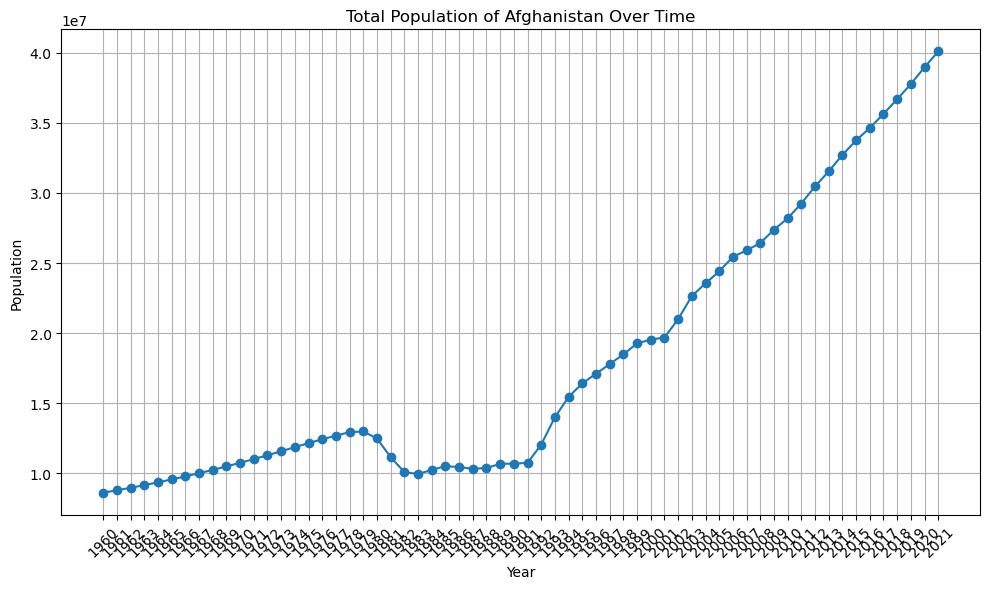

In [105]:
country_name = 'Afghanistan'
country_data = data[data['Country Name'] == country_name]
years = country_data.columns[4:-1]  
population = country_data.values[0][4:-1]
plt.figure(figsize=(10, 6))
plt.plot(years, population, marker='o', linestyle='-')
plt.title(f"Total Population of {country_name} Over Time")
plt.xlabel("Year")
plt.ylabel("Population")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [82]:
IC = data[data['Indicator Code'] == 'SP.POP.TOTL']
IC

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1761985.0
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,...,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,...,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,...,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0


In [83]:
IC_sort = IC.sort_values(by = '2022', ascending = False)
First_10 = IC_sort.head(10)
First_10

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
257,World,WLD,"Population, total",SP.POP.TOTL,3.031474e+09,3.072422e+09,3.126850e+09,3.193429e+09,3.260442e+09,3.328209e+09,...,7.229303e+09,7.317040e+09,7.403850e+09,7.490415e+09,7.576442e+09,7.660371e+09,7.741775e+09,7.820206e+09,7.888306e+09,7.950947e+09
103,IDA & IBRD total,IBT,"Population, total",SP.POP.TOTL,2.297972e+09,2.329504e+09,2.374276e+09,2.431314e+09,2.488809e+09,2.547220e+09,...,6.079502e+09,6.160290e+09,6.240231e+09,6.319805e+09,6.399653e+09,6.477695e+09,6.553978e+09,6.627317e+09,6.695488e+09,6.754030e+09
139,Low & middle income,LMY,"Population, total",SP.POP.TOTL,2.243179e+09,2.274050e+09,2.318173e+09,2.374537e+09,2.431355e+09,2.489219e+09,...,6.000647e+09,6.081161e+09,6.160876e+09,6.240319e+09,6.320334e+09,6.399037e+09,6.476093e+09,6.549996e+09,6.618837e+09,6.678280e+09
155,Middle income,MIC,"Population, total",SP.POP.TOTL,2.107416e+09,2.135116e+09,2.175940e+09,2.228877e+09,2.282094e+09,2.336193e+09,...,5.446811e+09,5.513458e+09,5.578703e+09,5.642636e+09,5.706387e+09,5.768171e+09,5.827338e+09,5.882943e+09,5.933587e+09,5.974552e+09
102,IBRD only,IBD,"Population, total",SP.POP.TOTL,1.904347e+09,1.926043e+09,1.960606e+09,2.007061e+09,2.053555e+09,2.100537e+09,...,4.567978e+09,4.616585e+09,4.663653e+09,4.709004e+09,4.753252e+09,4.794556e+09,4.832929e+09,4.867092e+09,4.895373e+09,4.913887e+09
62,Early-demographic dividend,EAR,"Population, total",SP.POP.TOTL,9.794615e+08,1.004319e+09,1.029962e+09,1.056327e+09,1.083430e+09,1.110603e+09,...,3.078407e+09,3.121656e+09,3.165215e+09,3.208370e+09,3.250753e+09,3.292897e+09,3.334562e+09,3.374384e+09,3.411268e+09,3.447399e+09
138,Lower middle income,LMC,"Population, total",SP.POP.TOTL,9.058328e+08,9.276212e+08,9.499254e+08,9.728725e+08,9.963528e+08,1.020044e+09,...,2.813932e+09,2.858673e+09,2.902878e+09,2.946639e+09,2.990173e+09,3.033153e+09,3.075312e+09,3.117226e+09,3.157462e+09,3.190184e+09
247,Upper middle income,UMC,"Population, total",SP.POP.TOTL,1.201583e+09,1.207494e+09,1.226014e+09,1.256005e+09,1.285741e+09,1.316149e+09,...,2.632879e+09,2.654785e+09,2.675825e+09,2.695996e+09,2.716215e+09,2.735018e+09,2.752026e+09,2.765717e+09,2.776125e+09,2.784368e+09
63,East Asia & Pacific,EAS,"Population, total",SP.POP.TOTL,1.043334e+09,1.045203e+09,1.059600e+09,1.085399e+09,1.110819e+09,1.136927e+09,...,2.261274e+09,2.278232e+09,2.294507e+09,2.310722e+09,2.327133e+09,2.341384e+09,2.353857e+09,2.363934e+09,2.370190e+09,2.375162e+09
141,Late-demographic dividend,LTE,"Population, total",SP.POP.TOTL,1.095549e+09,1.097729e+09,1.112143e+09,1.137972e+09,1.163377e+09,1.189486e+09,...,2.228485e+09,2.244043e+09,2.258406e+09,2.272340e+09,2.286628e+09,2.298988e+09,2.309492e+09,2.317278e+09,2.322606e+09,2.325543e+09


Text(0, 0.5, 'Country')

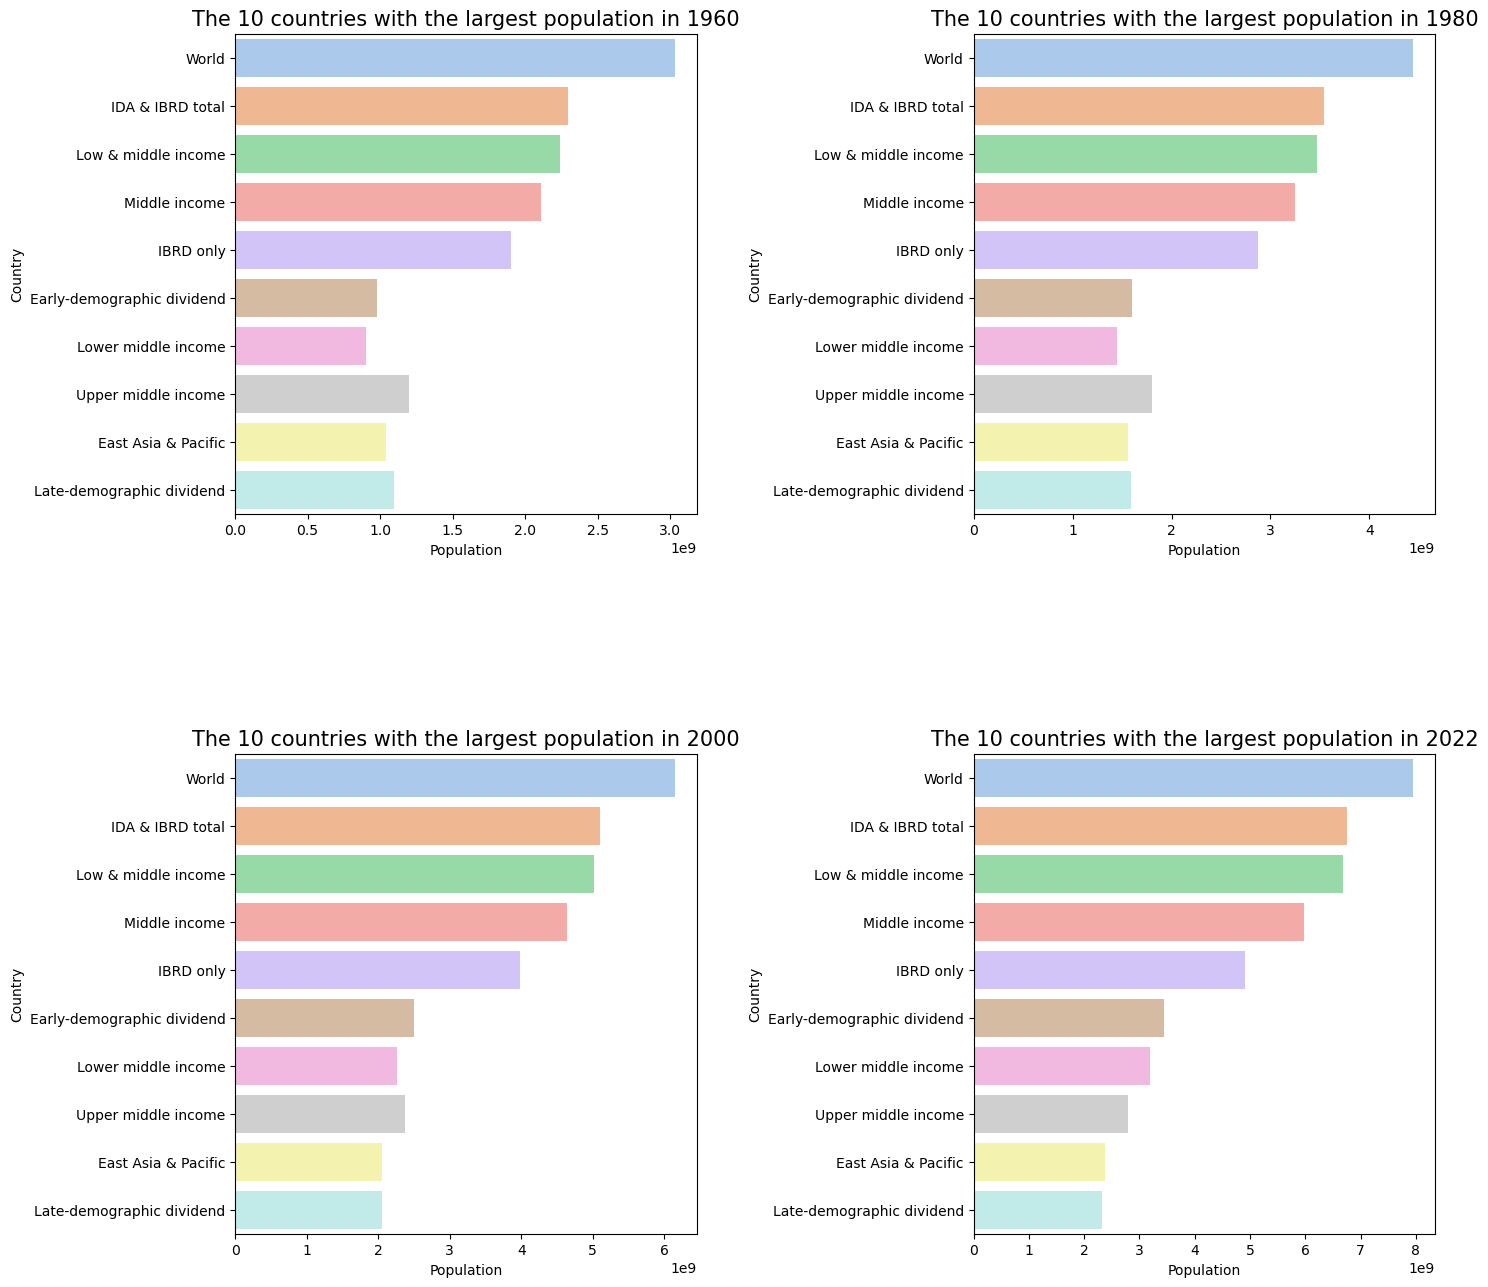

In [86]:
plt.figure(figsize = (15, 15))
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, top =0.9, wspace = 0.6, hspace = 0.5)

plt.subplot(2, 2, 1)
plt.title('The 10 countries with the largest population in 1960', size = 15)
sns.barplot(x = '1960', y = 'Country Name', data = First_10, palette= 'pastel')
plt.xlabel('Population')
plt.ylabel('Country')

plt.subplot(2, 2, 2)
plt.title('The 10 countries with the largest population in 1980', size = 15)
sns.barplot(x = '1980', y = 'Country Name', data = First_10, palette= 'pastel')
plt.xlabel('Population')
plt.ylabel('Country')

plt.subplot(2, 2, 3)
plt.title('The 10 countries with the largest population in 2000', size = 15)
sns.barplot(x = '2000', y = 'Country Name', data = First_10, palette= 'pastel')
plt.xlabel('Population')
plt.ylabel('Country')


plt.subplot(2, 2, 4)
plt.title('The 10 countries with the largest population in 2022', size = 15)
sns.barplot(x = '2022', y = 'Country Name', data = First_10, palette= 'pastel')
plt.xlabel('Population')
plt.ylabel('Country')

In [87]:
IC_male = data[data['Indicator Code'] == 'SP.POP.TOTL.MA.IN']
IC_sort_male = IC_male.sort_values(by = '2022', ascending = False)
First_10_male = IC_sort_male.head(10)
First_10_male

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
789,World,WLD,"Population, male",SP.POP.TOTL.MA.IN,1.514860e+09,1.535309e+09,1.562679e+09,1.596305e+09,1.630147e+09,1.664253e+09,...,3.637693e+09,3.682046e+09,3.725936e+09,3.769468e+09,3.812480e+09,3.854340e+09,3.894743e+09,3.933158e+09,3.966057e+09,3.996521e+09
633,IDA & IBRD total,IBT,"Population, male",SP.POP.TOTL.MA.IN,1.156430e+09,1.172211e+09,1.194802e+09,1.223697e+09,1.252817e+09,1.282335e+09,...,3.066620e+09,3.107190e+09,3.147184e+09,3.186707e+09,3.226282e+09,3.264942e+09,3.302629e+09,3.338658e+09,3.371850e+09,3.400361e+09
670,Low & middle income,LMY,"Population, male",SP.POP.TOTL.MA.IN,1.129336e+09,1.144785e+09,1.167050e+09,1.195610e+09,1.224395e+09,1.253642e+09,...,3.028112e+09,3.068560e+09,3.108458e+09,3.147935e+09,3.187613e+09,3.226618e+09,3.264714e+09,3.301057e+09,3.334612e+09,3.363550e+09
686,Middle income,MIC,"Population, male",SP.POP.TOTL.MA.IN,1.062397e+09,1.076269e+09,1.096891e+09,1.123748e+09,1.150743e+09,1.178120e+09,...,2.751879e+09,2.785366e+09,2.818000e+09,2.849692e+09,2.881214e+09,2.911749e+09,2.940894e+09,2.968080e+09,2.992542e+09,3.012262e+09
632,IBRD only,IBD,"Population, male",SP.POP.TOTL.MA.IN,9.574015e+08,9.682672e+08,9.857433e+08,1.009327e+09,1.032928e+09,1.056712e+09,...,2.310217e+09,2.334831e+09,2.358655e+09,2.381450e+09,2.403542e+09,2.424113e+09,2.443121e+09,2.459742e+09,2.473091e+09,2.481711e+09
592,Early-demographic dividend,EAR,"Population, male",SP.POP.TOTL.MA.IN,5.007111e+08,5.133947e+08,5.264873e+08,5.399551e+08,5.538018e+08,5.676377e+08,...,1.566068e+09,1.587813e+09,1.609681e+09,1.631197e+09,1.652285e+09,1.673275e+09,1.693990e+09,1.713607e+09,1.731600e+09,1.749271e+09
669,Lower middle income,LMC,"Population, male",SP.POP.TOTL.MA.IN,4.606323e+08,4.717973e+08,4.832350e+08,4.950131e+08,5.070660e+08,5.192259e+08,...,1.429571e+09,1.452070e+09,1.474158e+09,1.495891e+09,1.517557e+09,1.538957e+09,1.559903e+09,1.580726e+09,1.600670e+09,1.616875e+09
779,Upper middle income,UMC,"Population, male",SP.POP.TOTL.MA.IN,6.017644e+08,6.044716e+08,6.136564e+08,6.287349e+08,6.436773e+08,6.588937e+08,...,1.322307e+09,1.333296e+09,1.343842e+09,1.353801e+09,1.363657e+09,1.372792e+09,1.380991e+09,1.387354e+09,1.391873e+09,1.395387e+09
593,East Asia & Pacific,EAS,"Population, male",SP.POP.TOTL.MA.IN,5.281028e+08,5.287419e+08,5.358234e+08,5.487663e+08,5.615253e+08,5.745814e+08,...,1.145322e+09,1.153869e+09,1.162027e+09,1.170090e+09,1.178159e+09,1.185058e+09,1.191038e+09,1.195722e+09,1.198371e+09,1.200400e+09
672,Late-demographic dividend,LTE,"Population, male",SP.POP.TOTL.MA.IN,5.472294e+08,5.480889e+08,5.552327e+08,5.682331e+08,5.810115e+08,5.941311e+08,...,1.122773e+09,1.130673e+09,1.137981e+09,1.144980e+09,1.151985e+09,1.157939e+09,1.162846e+09,1.166181e+09,1.168185e+09,1.169160e+09


Text(0, 0.5, 'Country')

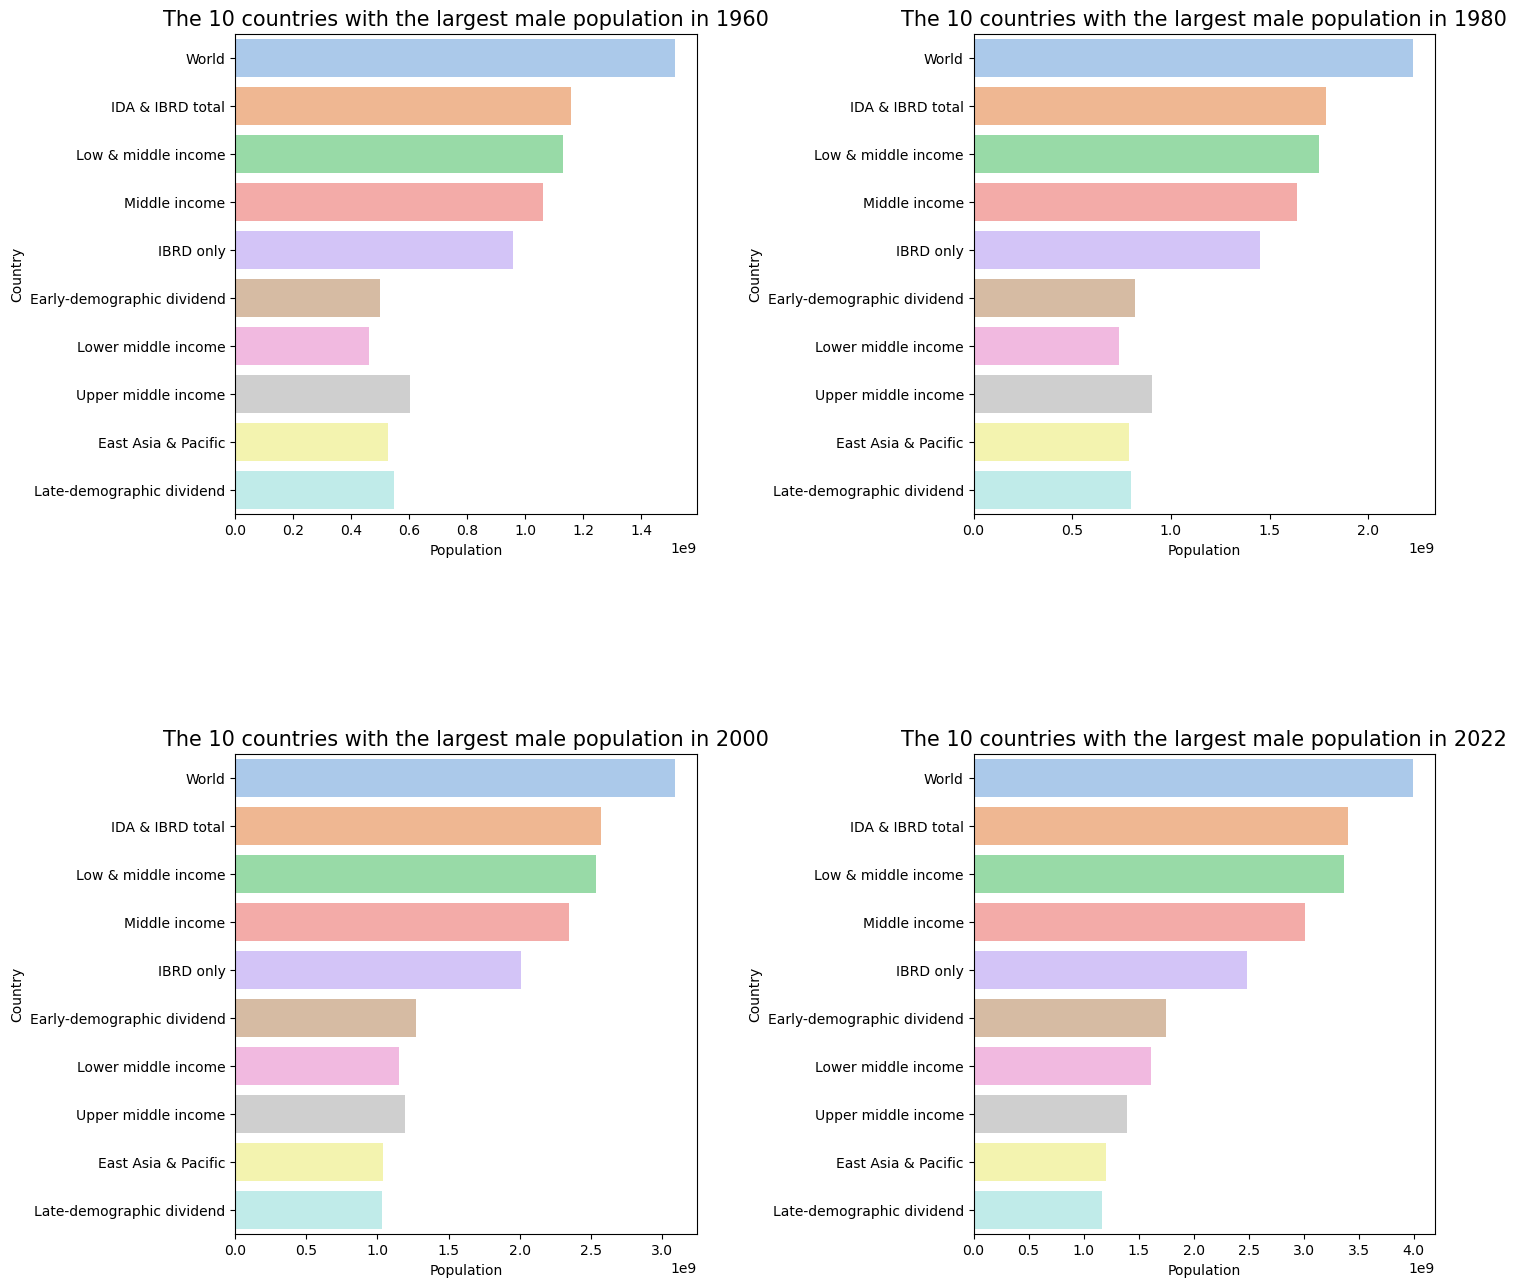

In [88]:
plt.figure(figsize = (15, 15))
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, top =0.9, wspace = 0.6, hspace = 0.5)

plt.subplot(2, 2, 1)
plt.title('The 10 countries with the largest male population in 1960', size = 15)
sns.barplot(x = '1960', y = 'Country Name', data = First_10_male, palette= 'pastel')
plt.xlabel('Population')
plt.ylabel('Country')

plt.subplot(2, 2, 2)
plt.title('The 10 countries with the largest male population in 1980', size = 15)
sns.barplot(x = '1980', y = 'Country Name', data = First_10_male, palette= 'pastel')
plt.xlabel('Population')
plt.ylabel('Country')

plt.subplot(2, 2, 3)
plt.title('The 10 countries with the largest male population in 2000', size = 15)
sns.barplot(x = '2000', y = 'Country Name', data = First_10_male, palette= 'pastel')
plt.xlabel('Population')
plt.ylabel('Country')


plt.subplot(2, 2, 4)
plt.title('The 10 countries with the largest male population in 2022', size = 15)
sns.barplot(x = '2022', y = 'Country Name', data =First_10_male, palette= 'pastel')
plt.xlabel('Population')
plt.ylabel('Country')

In [89]:
IC_female = data[data['Indicator Code'] == 'SP.POP.TOTL.FE.IN']

IC_sort_female = IC_female.sort_values(by = '2022', ascending = False)
First_10_female = IC_sort_female.head(10)
First_10_female

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
523,World,WLD,"Population, female",SP.POP.TOTL.FE.IN,1.516615e+09,1.537113e+09,1.564171e+09,1.597124e+09,1.630295e+09,1.663956e+09,...,3.591610e+09,3.634994e+09,3.677914e+09,3.720948e+09,3.763962e+09,3.806032e+09,3.847032e+09,3.887047e+09,3.922249e+09,3.954426e+09
367,IDA & IBRD total,IBT,"Population, female",SP.POP.TOTL.FE.IN,1.141542e+09,1.157293e+09,1.179474e+09,1.207617e+09,1.235992e+09,1.264885e+09,...,3.012881e+09,3.053100e+09,3.093047e+09,3.133098e+09,3.173371e+09,3.212754e+09,3.251349e+09,3.288659e+09,3.323637e+09,3.353669e+09
404,Low & middle income,LMY,"Population, female",SP.POP.TOTL.FE.IN,1.113842e+09,1.129265e+09,1.151123e+09,1.178927e+09,1.206960e+09,1.235577e+09,...,2.972535e+09,3.012601e+09,3.052418e+09,3.092384e+09,3.132721e+09,3.172418e+09,3.211379e+09,3.248939e+09,3.284225e+09,3.314730e+09
420,Middle income,MIC,"Population, female",SP.POP.TOTL.FE.IN,1.045019e+09,1.058847e+09,1.079048e+09,1.105129e+09,1.131350e+09,1.158073e+09,...,2.694932e+09,2.728092e+09,2.760703e+09,2.792943e+09,2.825174e+09,2.856422e+09,2.886443e+09,2.914863e+09,2.941045e+09,2.962291e+09
366,IBRD only,IBD,"Population, female",SP.POP.TOTL.FE.IN,9.469452e+08,9.577753e+08,9.748630e+08,9.977336e+08,1.020627e+09,1.043825e+09,...,2.257761e+09,2.281754e+09,2.304998e+09,2.327554e+09,2.349710e+09,2.370443e+09,2.389808e+09,2.407349e+09,2.422282e+09,2.432176e+09
326,Early-demographic dividend,EAR,"Population, female",SP.POP.TOTL.FE.IN,4.787504e+08,4.909247e+08,5.034750e+08,5.163723e+08,5.296284e+08,5.429657e+08,...,1.512339e+09,1.533843e+09,1.555534e+09,1.577173e+09,1.598468e+09,1.619622e+09,1.640571e+09,1.660776e+09,1.679669e+09,1.698128e+09
403,Lower middle income,LMC,"Population, female",SP.POP.TOTL.FE.IN,4.452005e+08,4.558238e+08,4.666904e+08,4.778595e+08,4.892868e+08,5.008181e+08,...,1.384361e+09,1.406604e+09,1.428720e+09,1.450748e+09,1.472616e+09,1.494196e+09,1.515409e+09,1.536499e+09,1.556793e+09,1.573309e+09
513,Upper middle income,UMC,"Population, female",SP.POP.TOTL.FE.IN,5.998189e+08,6.030228e+08,6.123580e+08,6.272699e+08,6.420634e+08,6.572552e+08,...,1.310571e+09,1.321489e+09,1.331983e+09,1.342195e+09,1.352558e+09,1.362226e+09,1.371035e+09,1.378363e+09,1.384252e+09,1.388981e+09
327,East Asia & Pacific,EAS,"Population, female",SP.POP.TOTL.FE.IN,5.152308e+08,5.164611e+08,5.237768e+08,5.366327e+08,5.492939e+08,5.623457e+08,...,1.115953e+09,1.124363e+09,1.132480e+09,1.140631e+09,1.148974e+09,1.156326e+09,1.162819e+09,1.168212e+09,1.171818e+09,1.174762e+09
406,Late-demographic dividend,LTE,"Population, female",SP.POP.TOTL.FE.IN,5.483193e+08,5.496401e+08,5.569102e+08,5.697384e+08,5.823653e+08,5.953547e+08,...,1.105712e+09,1.113371e+09,1.120425e+09,1.127360e+09,1.134642e+09,1.141049e+09,1.146645e+09,1.151097e+09,1.154422e+09,1.156383e+09


Text(0, 0.5, 'Country')

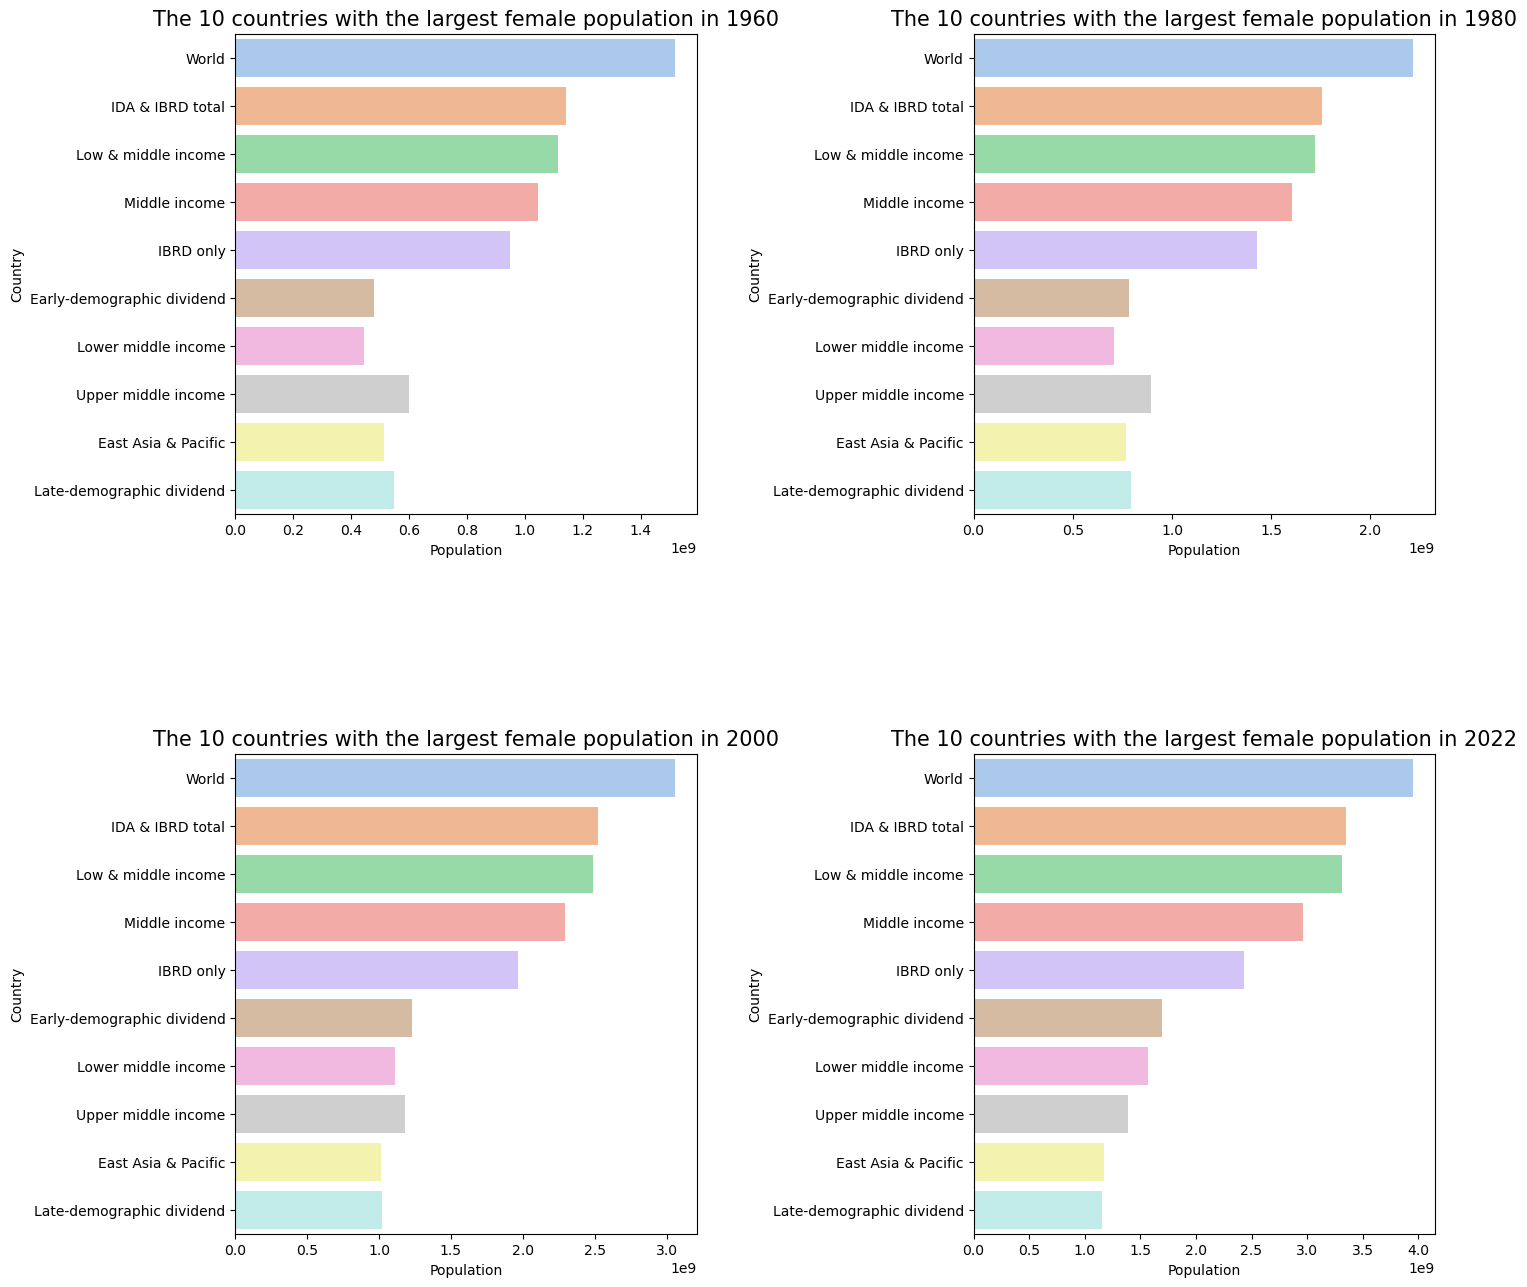

In [90]:
plt.figure(figsize = (15, 15))
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, top =0.9, wspace = 0.6, hspace = 0.5)

plt.subplot(2, 2, 1)
plt.title('The 10 countries with the largest female population in 1960', size = 15)
sns.barplot(x = '1960', y = 'Country Name', data = First_10_female, palette= 'pastel')
plt.xlabel('Population')
plt.ylabel('Country')

plt.subplot(2, 2, 2)
plt.title('The 10 countries with the largest female population in 1980', size = 15)
sns.barplot(x = '1980', y = 'Country Name', data = First_10_female, palette= 'pastel')
plt.xlabel('Population')
plt.ylabel('Country')

plt.subplot(2, 2, 3)
plt.title('The 10 countries with the largest female population in 2000', size = 15)
sns.barplot(x = '2000', y = 'Country Name', data = First_10_female, palette= 'pastel')
plt.xlabel('Population')
plt.ylabel('Country')


plt.subplot(2, 2, 4)
plt.title('The 10 countries with the largest female population in 2022', size = 15)
sns.barplot(x = '2022', y = 'Country Name', data =First_10_female, palette= 'pastel')
plt.xlabel('Population')
plt.ylabel('Country')

In [93]:
combined_data = pd.merge(IC_male, IC_female, on = 'Country Name', suffixes=('_male', '_female'))

combined_data['Total Population 1960'] = combined_data['1960_male'] + combined_data['1960_female']
combined_data['Total Population 1980'] = combined_data['1980_male'] + combined_data['1980_female']
combined_data['Total Population 2000'] = combined_data['2000_male'] + combined_data['2000_female']
combined_data['Total Population 2022'] = combined_data['2022_male'] + combined_data['2022_female']

,Country Name,Country Code_male,Indicator Name_male,Indicator Code_male,1960_male,1961_male,1962_male,1963_male,1964_male,1965_male,...,2017_female,2018_female,2019_female,2020_female,2021_female,2022_female,Total Population 1960,Total Population 1980,Total Population 2000,Total Population 2022
257,World,WLD,"Population, male",SP.POP.TOTL.MA.IN,1.514860e+09,1.535309e+09,1.562679e+09,1.596305e+09,1.630147e+09,1.664253e+09,...,3.763962e+09,3.806032e+09,3.847032e+09,3.887047e+09,3.922249e+09,3.954426e+09,3.031474e+09,4.442348e+09,6.144321e+09,7.950947e+09
103,IDA & IBRD total,IBT,"Population, male",SP.POP.TOTL.MA.IN,1.156430e+09,1.172211e+09,1.194802e+09,1.223697e+09,1.252817e+09,1.282335e+09,...,3.173371e+09,3.212754e+09,3.251349e+09,3.288659e+09,3.323637e+09,3.353669e+09,2.297972e+09,3.537803e+09,5.093906e+09,6.754030e+09
139,Low & middle income,LMY,"Population, male",SP.POP.TOTL.MA.IN,1.129336e+09,1.144785e+09,1.167050e+09,1.195610e+09,1.224395e+09,1.253642e+09,...,3.132721e+09,3.172418e+09,3.211379e+09,3.248939e+09,3.284225e+09,3.314730e+09,2.243179e+09,3.469529e+09,5.017754e+09,6.678280e+09
155,Middle income,MIC,"Population, male",SP.POP.TOTL.MA.IN,1.062397e+09,1.076269e+09,1.096891e+09,1.123748e+09,1.150743e+09,1.178120e+09,...,2.825174e+09,2.856422e+09,2.886443e+09,2.914863e+09,2.941045e+09,2.962291e+09,2.107416e+09,3.244431e+09,4.635161e+09,5.974552e+09
102,IBRD only,IBD,"Population, male",SP.POP.TOTL.MA.IN,9.574015e+08,9.682672e+08,9.857433e+08,1.009327e+09,1.032928e+09,1.056712e+09,...,2.349710e+09,2.370443e+09,2.389808e+09,2.407349e+09,2.422282e+09,2.432176e+09,1.904347e+09,2.877606e+09,3.980363e+09,4.913887e+09
62,Early-demographic dividend,EAR,"Population, male",SP.POP.TOTL.MA.IN,5.007111e+08,5.133947e+08,5.264873e+08,5.399551e+08,5.538018e+08,5.676377e+08,...,1.598468e+09,1.619622e+09,1.640571e+09,1.660776e+09,1.679669e+09,1.698128e+09,9.794615e+08,1.598348e+09,2.499207e+09,3.447399e+09
138,Lower middle income,LMC,"Population, male",SP.POP.TOTL.MA.IN,4.606323e+08,4.717973e+08,4.832350e+08,4.950131e+08,5.070660e+08,5.192259e+08,...,1.472616e+09,1.494196e+09,1.515409e+09,1.536499e+09,1.556793e+09,1.573309e+09,9.058328e+08,1.446430e+09,2.259880e+09,3.190184e+09
247,Upper middle income,UMC,"Population, male",SP.POP.TOTL.MA.IN,6.017644e+08,6.044716e+08,6.136564e+08,6.287349e+08,6.436773e+08,6.588937e+08,...,1.352558e+09,1.362226e+09,1.371035e+09,1.378363e+09,1.384252e+09,1.388981e+09,1.201583e+09,1.798002e+09,2.375281e+09,2.784368e+09
63,East Asia & Pacific,EAS,"Population, male",SP.POP.TOTL.MA.IN,5.281028e+08,5.287419e+08,5.358234e+08,5.487663e+08,5.615253e+08,5.745814e+08,...,1.148974e+09,1.156326e+09,1.162819e+09,1.168212e+09,1.171818e+09,1.174762e+09,1.043334e+09,1.556403e+09,2.048149e+09,2.375162e+09
141,Late-demographic dividend,LTE,"Population, male",SP.POP.TOTL.MA.IN,5.472294e+08,5.480889e+08,5.552327e+08,5.682331e+08,5.810115e+08,5.941311e+08,...,1.134642e+09,1.141049e+09,1.146645e+09,1.151097e+09,1.154422e+09,1.156383e+09,1.095549e+09,1.593099e+09,2.046026e+09,2.325543e+09


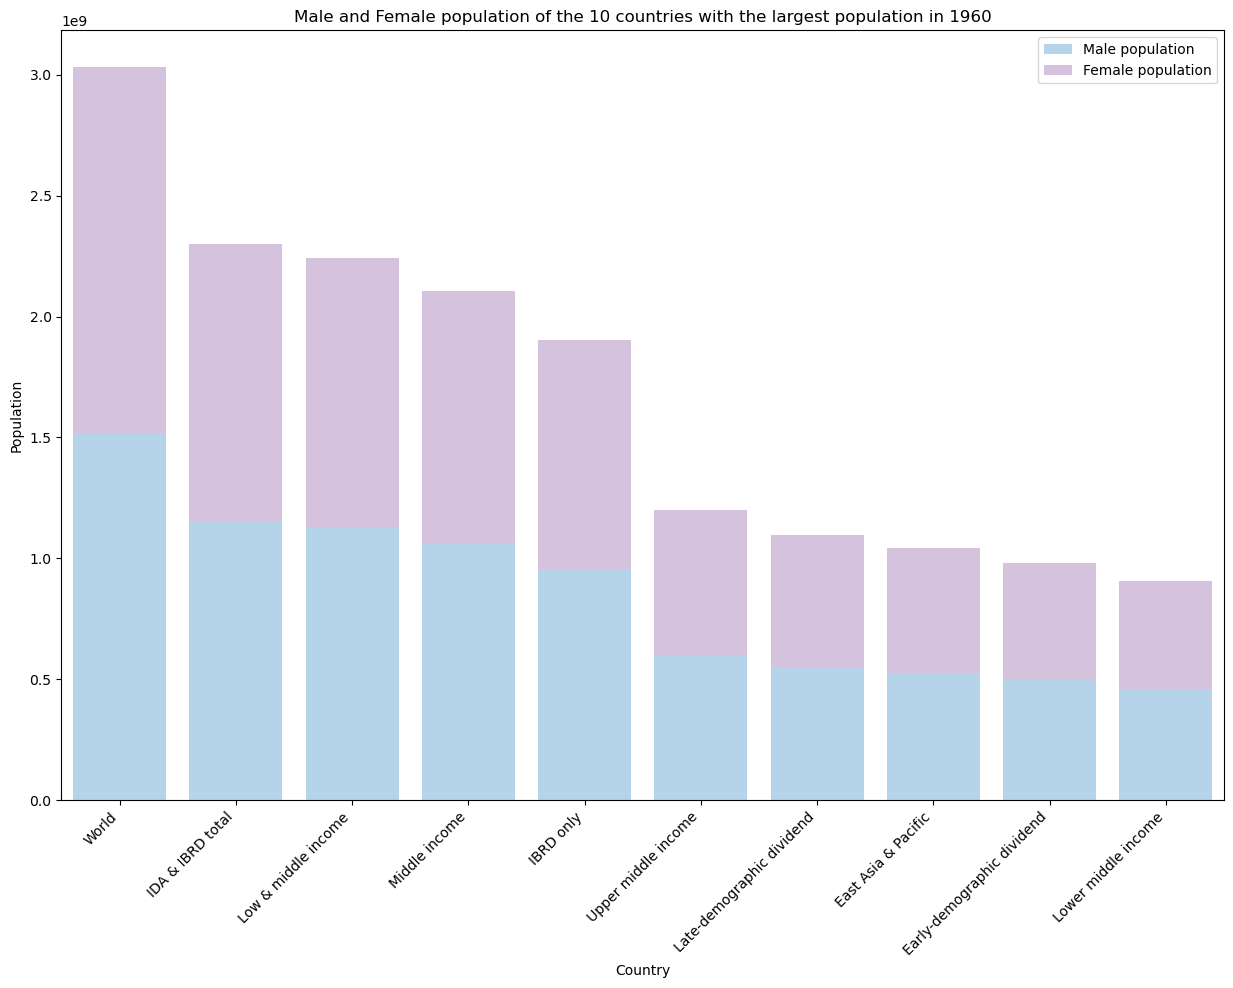

In [102]:
data_total_1960= combined_data.sort_values(by = 'Total Population 1960', ascending= False)
data_total_1960 = data_total_1960.head(10)
data_total_1960
plt.figure(figsize = (15, 10))

plt.title('Male and Female population of the 10 countries with the largest population in 1960')
sns.barplot(x='Country Name', y = '1960_male', data = data_total_1960, color = '#AED6F1', label = 'Male population')
sns.barplot(x='Country Name', y = '1960_female', data = data_total_1960, bottom = data_total_1960['1960_male'], label = 'Female population', color = '#D7BDE2')
plt.legend()
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

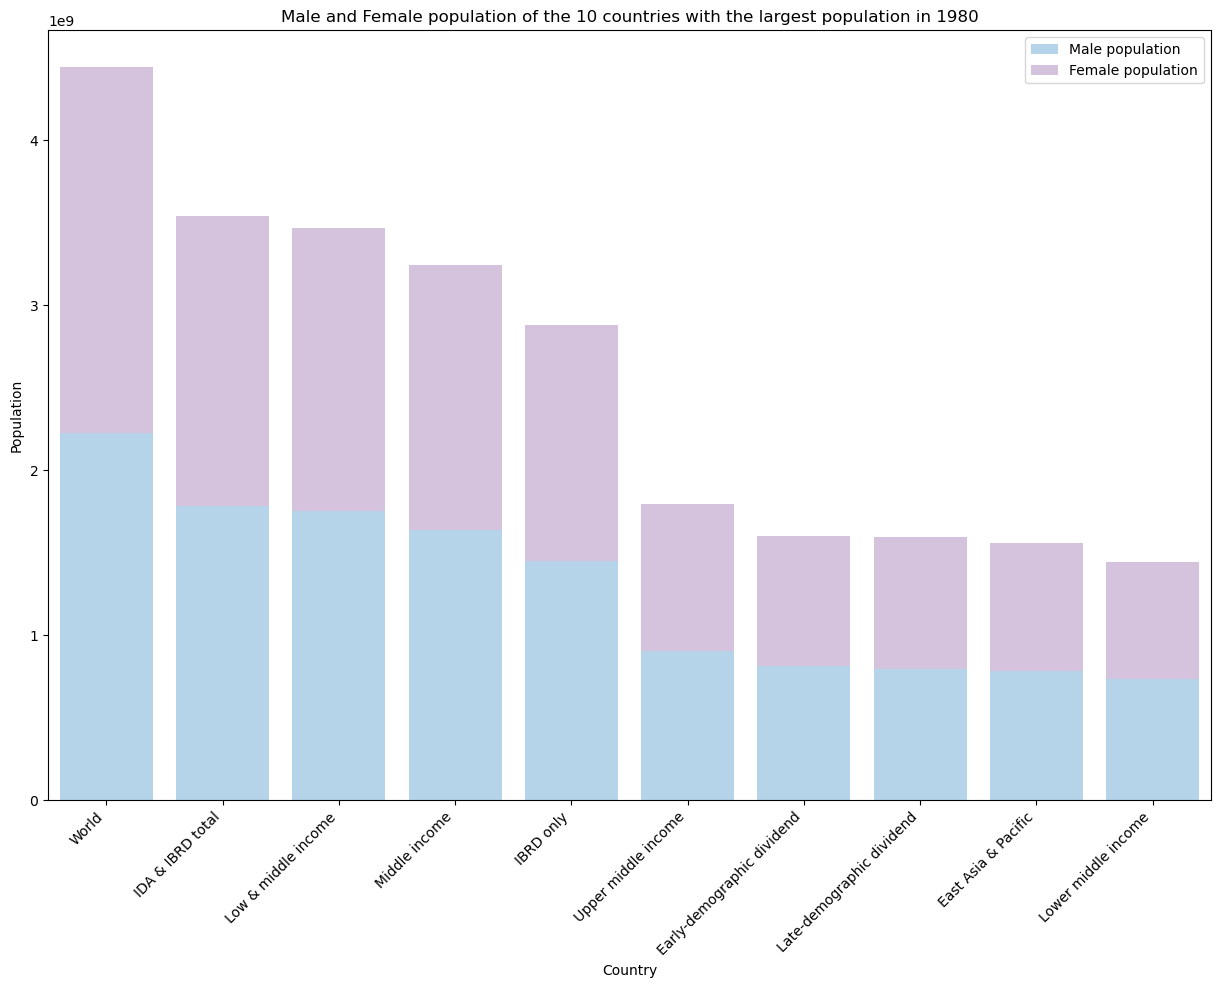

In [100]:
data_total_1980= combined_data.sort_values(by = 'Total Population 1980', ascending= False)
data_total_1980 = data_total_1980.head(10)
data_total_1980
plt.figure(figsize = (15, 10))

plt.title('Male and Female population of the 10 countries with the largest population in 1980')
sns.barplot(x='Country Name', y = '1980_male', data = data_total_1980, color = '#AED6F1', label = 'Male population')
sns.barplot(x='Country Name', y = '1980_female', data = data_total_1980, bottom = data_total_1980['1980_male'], label = 'Female population', color = '#D7BDE2')
plt.legend()
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

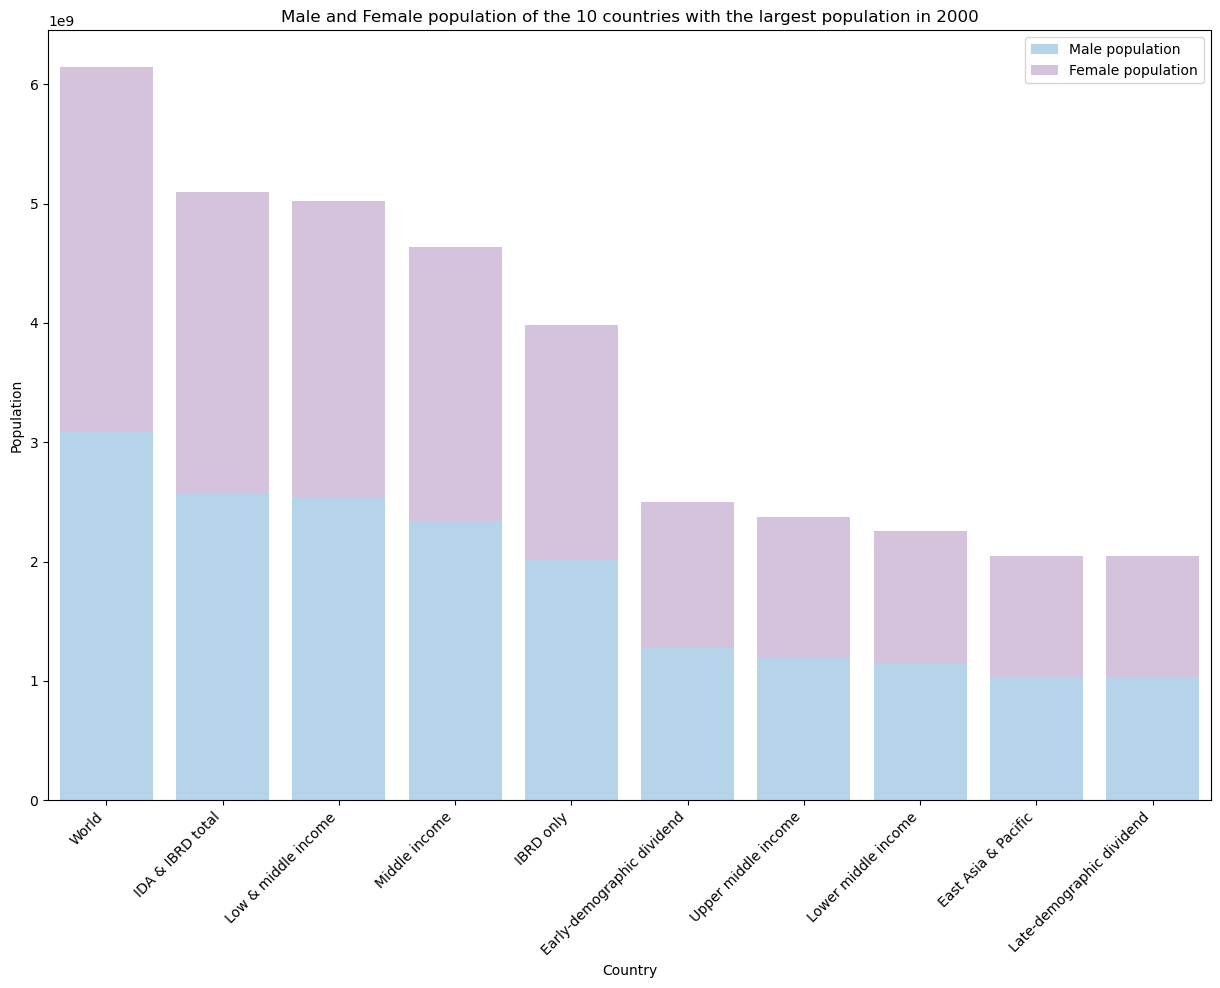

In [103]:
data_total_2000= combined_data.sort_values(by = 'Total Population 2000', ascending= False)
data_total_2000 = data_total_2000.head(10)
data_total_2000
plt.figure(figsize = (15, 10))

plt.title('Male and Female population of the 10 countries with the largest population in 2000')
sns.barplot(x='Country Name', y = '2000_male', data = data_total_2000, color = '#AED6F1', label = 'Male population')
sns.barplot(x='Country Name', y = '2000_female', data = data_total_2000, bottom = data_total_2000['2000_male'], label = 'Female population', color = '#D7BDE2')
plt.legend()
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

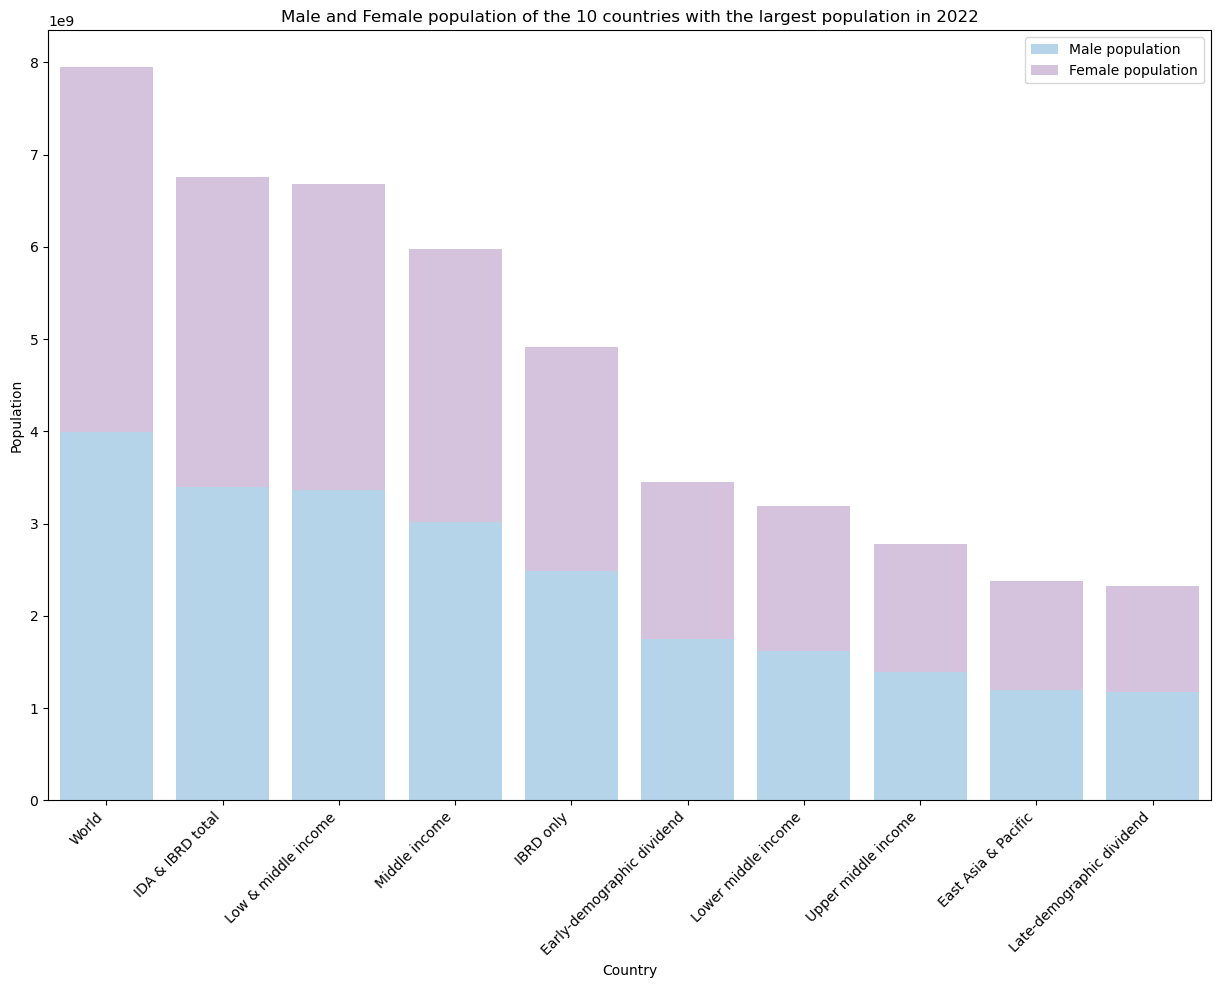

In [104]:
data_total_2022= combined_data.sort_values(by = 'Total Population 2022', ascending= False)
data_total_2022 = data_total_2022.head(10)
data_total_2022
plt.figure(figsize = (15, 10))

plt.title('Male and Female population of the 10 countries with the largest population in 2022')
sns.barplot(x='Country Name', y = '2022_male', data = data_total_2022, color = '#AED6F1', label = 'Male population')
sns.barplot(x='Country Name', y = '2022_female', data = data_total_2022, bottom = data_total_2022['2022_male'], label = 'Female population', color = '#D7BDE2')
plt.legend()
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation = 45, ha = 'right')
plt.show()